# Analyzing, and Visualizing Data

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [3]:
matplotlib.style.use('ggplot')

In [4]:
df = pd.read_csv('./Data/twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
rating_numerator        1994 non-null float64
rating_denominator      1994 non-null float64
name                    1994 non-null object
favorites               1994 non-null int64
retweets                1994 non-null int64
user_followers          1994 non-null int64
jpg_url                 1994 non-null object
dog_stage               1994 non-null object
prediction_algorithm    1686 non-null object
confidence_level        1994 non-null float64
dog_gender              862 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 249.3+ KB


In [5]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,38963,8637,6604923,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,NaN
1,680055455951884288,2015-12-24 16:00:30,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10.0,10.0,Sammy,17921,7868,6605568,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,None,Samoyed,0.995466,male
2,680070545539371008,2015-12-24 17:00:27,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2756,967,6605568,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811,NaN
3,680085611152338944,2015-12-24 18:00:19,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,13701,9803,6605568,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN,0.000000,NaN
4,680115823365742593,2015-12-24 20:00:22,Twitter for iPhone,This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9.0,10.0,Ozzy,2903,1006,6605568,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,None,pug,0.999365,male


In [6]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')
df['dog_gender'] = df['dog_gender'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2017-08-01 16:23:56 to 2016-06-03 01:07:16
Data columns (total 15 columns):
tweet_id                1994 non-null object
source                  1994 non-null category
text                    1994 non-null object
expanded_urls           1994 non-null object
rating_numerator        1994 non-null float64
rating_denominator      1994 non-null float64
name                    1994 non-null object
favorites               1994 non-null int64
retweets                1994 non-null int64
user_followers          1994 non-null int64
jpg_url                 1994 non-null object
dog_stage               1994 non-null category
prediction_algorithm    1686 non-null object
confidence_level        1994 non-null float64
dog_gender              862 non-null category
dtypes: category(3), float64(3), int64(3), object(6)
memory usage: 208.7+ KB


In [7]:
df.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000
mean,12.212528,10.510030,8881.511033,2731.733200,6.605405e+06,0.464991
std,41.463532,7.261522,12607.155686,4714.077626,2.665509e+02,0.339470
min,0.000000,7.000000,80.000000,13.000000,6.604681e+06,0.000000
25%,10.000000,10.000000,1935.000000,612.250000,6.605172e+06,0.140466
50%,11.000000,10.000000,4060.500000,1319.000000,6.605425e+06,0.459130
75%,12.000000,10.000000,11192.750000,3139.250000,6.605658e+06,0.776387
max,1776.000000,170.000000,143917.000000,77698.000000,6.605843e+06,0.999956


**Plot the correlation map to see the relationship between variables**


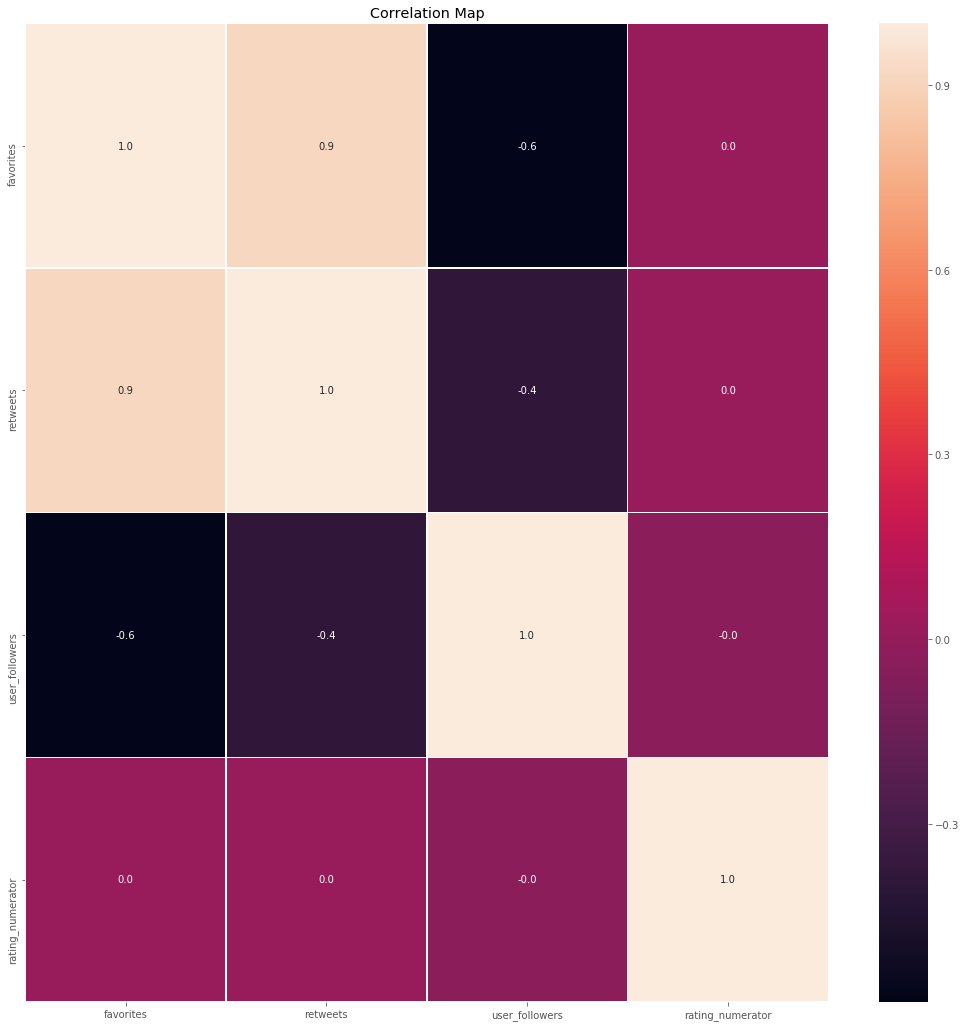

In [8]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[['source', 'favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between favorites and retweet, this is normal (more favorites mean more retweets)
- User followers and retweet have a weak negative correlation of -0.4 (this seems the opposite of normal prediction)
- Rating don't get affected with any other variable from the ones we ploted

#### Tweet Retweet Vs Favorites.

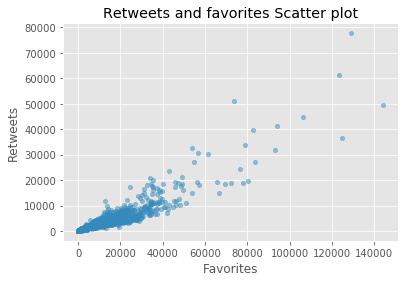

In [9]:
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

- As the correlation map shows that retweet is high correlated with favorites.

### Rating System

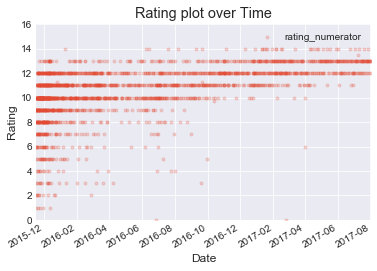

In [11]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')


- The page start with small rating than they adopt the system of rating numerator more than the denominator


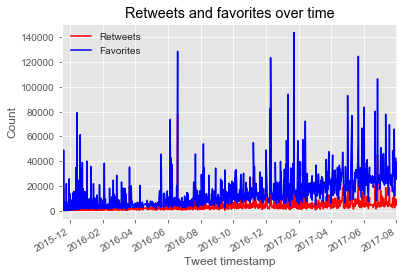

In [10]:
df['retweets'].plot(color = 'red', label='Retweets')
df['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

- Brent has all the right to get mad (ratings getting higher with no specific reason)


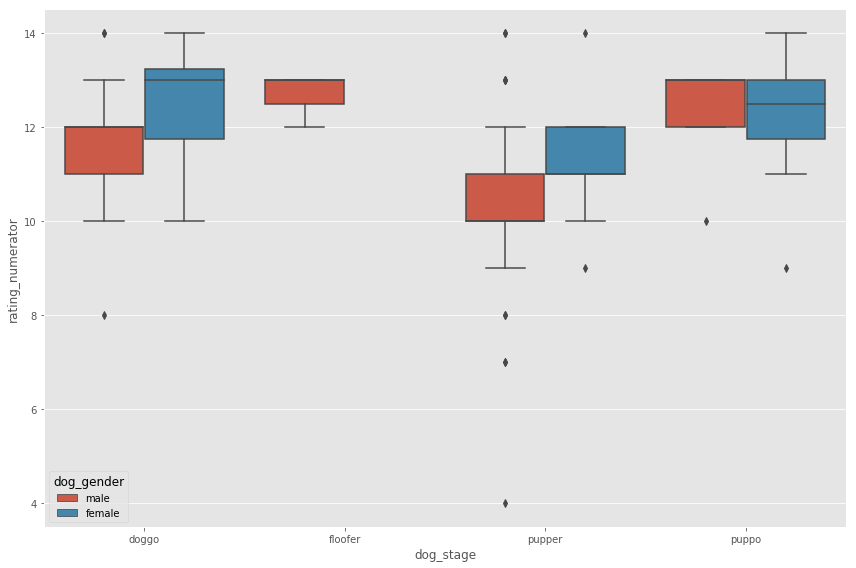

In [40]:
sns.factorplot(kind='box',        
               y='rating_numerator',       
               x='dog_stage', 
               hue='dog_gender',  
               data=df[df['dog_stage'] != 'None'], 
               size=8,               
               aspect=1.5,   
               legend_out=False) 

- According to our treatment (getting the gender from the text of the tweet) we have male dogs more than female dogs in our dataset, whatever the female rating mean more than the male rating mean

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

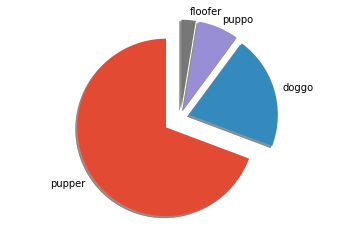

In [38]:
# Plot the data partitioned by dog stage
dog_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

In [41]:
df[df['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.888889
floofer    11.875000
pupper     10.638066
puppo      12.043478
Name: rating_numerator, dtype: float64

- Pupper is the most owned dog, but it has the lowest mean rating

### Conclusion

The Twitter account `WeRateDogs` (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "16/10". It has acquired over 4.5 million followers.

If you are thinking of adopting a dog, get a floof(er) - far away from being pupper at least still in the stage of puppo yet not a doggo to live more togother